Implementation of the [paper](https://arxiv.org/abs/1808.00508) Neural Arithmetic Logic Units. Inspired by Sayak Paul's [notebook](https://github.com/sayakpaul/TF-2.0-Hacks/tree/master/NALU%20in%20TF%202.0) 

In [0]:
!pip install tensorflow==2.0.0

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Layer
import matplotlib.pyplot as plt


In [2]:
tf.__version__


'2.0.0'

In [0]:
def generate_data(min_val, max_val, observations, op):
    data = np.random.uniform(min_val, max_val, size=(observations, 2))
    if op == '+':
        target = data[:, 0] + data[:, 1]
    elif op == '-':
        target = data[:, 0] - data[:, 1]
    elif op == '*':
        target = data[:, 0] * data[:, 1]
    elif op == '/':
        target = data[:, 0] / data[:, 1]
    elif op == '^2':
        data = np.random.uniform(min_val, max_val, size=(observations, 1))
        target = data ** 2
    elif op == 'sqrt':
        data = np.random.uniform(min_val, max_val, size=(observations, 1))
        target = np.sqrt(data)
    
    return data, target

In [0]:
class NAC_Layer(Layer):
  def __init__(self, num_outputs):
    super(NAC_Layer, self).__init__()
    self.num_outputs = num_outputs

  def build(self, input_shape):
    shape = (input_shape[-1], self.num_outputs)
    self.W_hat = self.add_variable("W_hat",
                                    shape=shape, initializer=tf.initializers.GlorotUniform())
    self.M_hat = self.add_variable("M_hat",
                                    shape=shape, initializer=tf.initializers.GlorotUniform())
    
    print(self.W_hat.shape, self.M_hat.shape)
    
  def call(self, x):
    w = tf.nn.tanh(self.W_hat)*tf.nn.sigmoid(self.M_hat)
    return (tf.matmul(x, w))




In [0]:
op = '+'
X_train, y_train = generate_data(20, 30, 10000, op)
X_test, y_test = generate_data(10, 40, 7000, op) #The test points are generated out of the training range

In [31]:
# Define a NAC layer with the output shape
nac_layer = NAC_Layer(1)
# Supply the input shape
pred = nac_layer(X_train)


(2, 1) (2, 1)

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [40]:
y_train.shape, tf.squeeze(pred).shape

((10000,), TensorShape([10000]))

In [0]:
loss_fn = tf.keras.losses.MeanSquaredError()
opt = tf.keras.optimizers.Adam(lr=0.01)

In [0]:
@tf.function
def train_fn(x_train, y_train, nac_layer):
  with tf.GradientTape() as tape:
    #Forward Pass
    preds = nac_layer(x_train)

    #Calculate loss
    error = loss_fn(y_train, tf.squeeze(preds))
    #error = loss(y_train, preds)

  #Calculate Gradients
  grads = tape.gradient(error, nac_layer.trainable_variables)

  #apply gradients
  opt.apply_gradients(zip(grads, nac_layer.trainable_variables))

  return error


In [0]:
total_train_loss = []

for i in range(1, 10000+1):

  train_loss = train_fn(X_train, y_train, nac_layer)
  total_train_loss.append(train_loss)


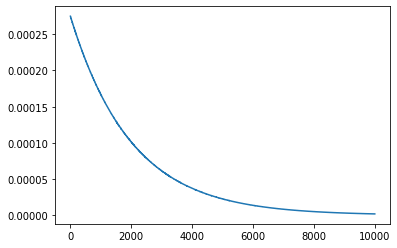

In [70]:
plt.plot(total_train_loss)
plt.show()

In [68]:
total_train_loss[1]

IndexError: ignored

In [67]:
len(total_train_loss)

1